## Accurate Uncertainties for Deep Learning Using Calibrated Regression

**Authors**: *Anthony Rentsch* and *Abhimanyu Vasishth*

This notebook contains an implementation and overview of the [2018 paper](https://arxiv.org/abs/1807.00263) by Kuleshov et al.

---

### Table of Contents

1. [Problem Statement](#problem_statement)
2. [Background](#background)
3. [Existing work](#existing_work)
4. [Contribution](#contribution)
5. [Technical Content](#technical_content)
6. [Experiments](#experiments)
7. [Evaluation](#evaluation)
8. [Future work](#future_work)
9. [Code](#code)
10. [References](#references)

<a id='problem_statement'></a>
#### Problem Statement 

what is the problem the paper aims to solve?

---

It is often desirable in statistical modeling and machine learning to obtain accurate estimates of the uncertainty associated with predictions, especially when these models are used in highly sensitive decision-making contexts. What are accurate estimates of uncertainty? One useful criteria is known as **calibration**. Consider these two motivation examples:

- In the classification setting, if we predict that an individual will exhibit some behavior with 30% probability it would be desirable for the long-term frequency of this individual exhibiting this behavior to actually be 30%.
- In the regression setting, it would be desirable for a 95% predictive interval to actually contain the true outcome 95% of the time.

If we meet this criteria in either setting, we would call our predictions **well-calibrated**. However, many types of algorithms do not produce well-calibrated predictions out-of-the-box. Since this is mostly a solved problem in classification, this paper provides a model-agnostic algorithm to calibrating credible intervals in regression. 

---

<a id='background'></a>
#### Background 

why is this problem important or interesting?

---

When do we want calibration?
- When model outputs being used for highly sensitive decision-making/planning, e.g., effects of drugs or public policies

When we don't care about calibration as much?
- When we just need to prioritize certain cases, so we just need rank-ordering


---

<a id='existing_work'></a>
#### Existing work 

what has been done in literature?

<a id='contribution'></a>
#### Contribution 

what is gap in literature that the paper is trying to fill? What is the unique contribution

<a id='technical_content'></a>
#### Technical content 

The intuition behind the author’s recalibration algorithm is to record where each observation lies with respect to the model’s predicted distribution for that point, compare that value to the predicted distributions for all the other observations, and then map each individual observation’s distribution so that it is in line with what the distribution across observations would have predicted. This mapping is used to transform the desired quantiles of the predicted interval in such a way that produces a predictive interval that is better calibrated based on the distribution of values across observations.

Generally, this is broken up into two components: (1) creating the recalibration dataset and (2) fitting and applying the calibration model.

*Recalibration dataset*

Let’s consider a regression model $H$ (this is referred to as the forecaster in the paper) that takes in inputs $X$ and predicts outputs $y$. $H$ outputs a probability distribution for each observation, either naturally in the Bayesian setting or through something like bootstrapping in the frequentist setting. This is typically referred to as the posterior predictive distribution. From this distribution, we can obtain a cumulative distribution function $F_t$ and evaluate it at the $y$ value for that observation. All of this is visualized in the plot below.

![Sketch of algorithm](images/regression_cdf_plot.png)


Why is this important or useful? First we need to define what it means to be calibrated in the regression setting. Formally, the authors say that a regression model is calibrated if

$$
\begin{aligned} 
\frac{\sum_{t=1}^T | \mathbb{I}\{y_t \leq F^{-1}(p)\} | }{T} \rightarrow p \quad \text{for all} p \in [0, 1]
\end{aligned}
$$

where $T$ is the number of data points, $F_t^{-1}$ is the inverse of $F_t$, and $p$ is the confidence level. 

If we let $p=90$, for example, this implies that 90% of our observations should fall below the 90% quantile of the CDF that the model outputs for each observation in order for the model to be calibrated. Thus, our first step is to measure where each observation $y_t$ falls in the CDF $F_t$ that $H$ outputs for $t$. The authors denote this $[H(x_t)](y_t)$.

We are not just interested as to whether each observation falls under the 90% quantile of the CDF at that corresponding $t$. We are interested in whether 90% of our observations fall under the 90% quantiles of their CDFs. It is useful to think of this distinction as the CDF for a single observation and the CDF across all observations. 

Now we need to calculate the CDF across all observations. Since we want to compare each observation to all other observations, we count the number of other observations for which the value of the CDF for that observation is less than or equal to the value of the CDF for the observation of interest. This is denoted $\hat{P}([H(x_t)](y_t))$. For instance, let $F_1(y_1) = 0.6$ and $\hat{P}([H(x_t)](y_t)) = 0.9$. This means that, while $y_1$ lies at the 60% quantile for its individual CDF it lies at the 90% quantile of the CDF across all observations.

We now have the recalibration set $D = \{ [H(x_t)](y_t), \hat{P}([H(x_t)](y_t)) \}$ where the independent variable is the value of the CDF for each observation and the dependent variable is the value of the across observation CDF for each observation.
 
*Calibration model*



<a id='experiments'></a>
#### Experiments 

which types of experiments were performed? What claims were these experiments trying to prove? Did the results prove the claims?

<a id='evaluation'></a>
#### Evaluation 

(your opinion) - do you think the work is technically sound? Do you think the proposed model/inference method is practical to use on real data and tasks? Do you think the experimental section was strong (there are sufficient evidence to support the claims and eliminate confounding factors)?

<a id='future_work'></a>
#### Future work 

One useful concept that the authors introduce is sharpness. Sharpness is akin to how useful the predictive interval is, i.e., how wide it is. If it is excessively wide, it does not allow for meaningful inference even if it is technically well-calibrated. Sharpness is a very relevant criteria for many practitioners. While having well-calibrated uncertainty estimates is important, what good is a machine learning model in weather forecasting if the temperature tomorrow is forecasted to be between 0 and 100 degrees Fahrenheit?
 
Yet, the authors largely do not discuss how a predictive interval can be made sharper. The only reference they make to directly improving a model’s sharpness is in their discussion of additional features that could be used for recalibration. They suggest that additional features beyond $[H(x_t)](y_t)$ could be used as inputs to the recalibration step to improve sharpness. 
 
Many practitioners would be interested in creating sharper predictive models in addition to better calibrated ones. Are there post-processing steps, like the one outlined in this paper, that could be used to make sharper forecasts? Or is this only something that can be remedied through the model building process itself? Future work on this subject would be of great value and would intersect with discussions of the impacts of epistemic and aleatoric uncertainty on machine learning models.

---

<a id='code'></a>
#### Code

- At least one clear working pedagogical example demonstrating the problem the paper is claiming to solve. 
- At lease a bare bones implementation of the model/algorithm/solution (in some cases, you may be able to make assumptions  to simplify the model/algorithm/solution with the approval of your instructor)
- Demonstration on at least one instance that your implementation solves the problem.
- Demonstration on at least one instance the failure mode of the model/algorithm/solution, with an explanation for why failure occurred (is the dataset too large? Did you choose a bad hyper parameter?). The point of this is to point out edge cases to the user.

In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
sns.set()

from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample

import statsmodels.api as sm
from statsmodels.api import OLS

%matplotlib inline

### Regression - underlying trend is linear

In [2]:
# make data
n = 1000
X = np.linspace(-3,3,n)

y = 0.4*X + np.sin(4*X) + np.random.normal(0, 3, size=n) #+ X + X**2
# sort for plotting
indices = np.argsort(X.flatten())
X = X[indices]
y = y[indices]
# prepare for statsmodels
X_sm = sm.add_constant(-X**2 - X**4 + 10*X)

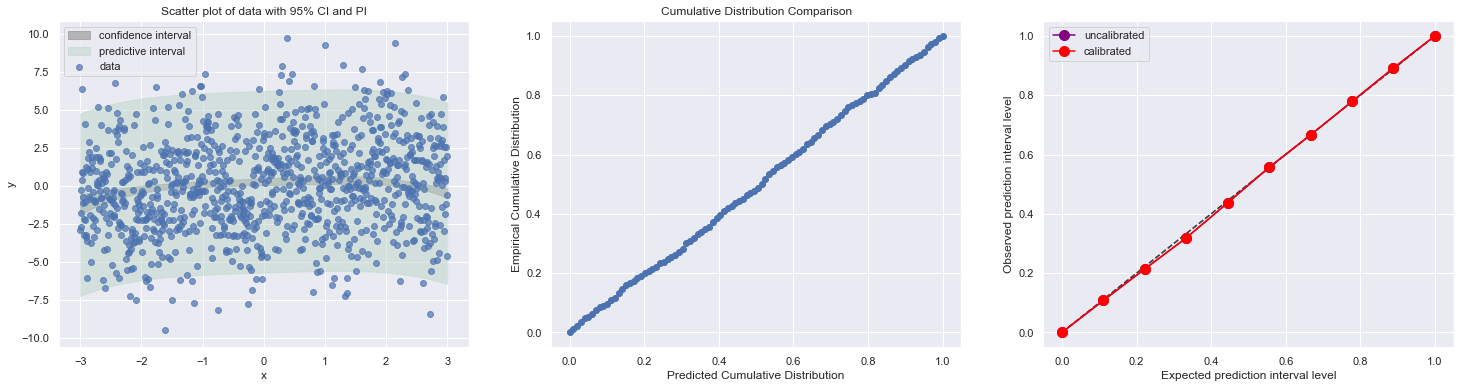

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(25,6))

# Figure 1
model = sm.OLS(y, X_sm).fit()
alpha = .95
fit = model.get_prediction().summary_frame(alpha=(1-alpha))
ax[0].fill_between(X.flatten(), fit['mean_ci_lower'], fit['mean_ci_upper'], 
                color='grey', alpha=0.5, label='confidence interval');
ax[0].fill_between(X.flatten(), fit['obs_ci_lower'], fit['obs_ci_upper'], 
                color='#BDD5C8', alpha=0.5, label='predictive interval')
ax[0].scatter(X.flatten(), y, alpha=0.7, label='data')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title(f'Scatter plot of data with {int(alpha*100)}% CI and PI')

# Figure 2
alphas = np.linspace(0,1,100)
counts = []
for i, alpha in enumerate(alphas): # is this right???
    fit = model.get_prediction().summary_frame(alpha=(1-alpha))
    count = fit[(fit['obs_ci_lower'] < y) & (fit['obs_ci_upper'] > y)].shape[0]
    counts.append(count/n)
ax[1].plot(alphas, counts, 'o')
ax[1].set_xlabel('Predicted Cumulative Distribution')
ax[1].set_ylabel('Empirical Cumulative Distribution')
ax[1].set_title('Cumulative Distribution Comparison')

# Figure 3
alphas = np.linspace(0,1,10)
uncalibrated_props = []
for i, alpha in enumerate(alphas):
    fit = model.get_prediction().summary_frame(alpha=(1-alpha))
    count = fit[(fit['obs_ci_lower'] < y) & (fit['obs_ci_upper'] > y)].shape[0]
    uncalibrated_props.append(count/n)
ir = IsotonicRegression()
calibrated_props = ir.fit_transform(alphas, uncalibrated_props)
ax[2].plot([(0,0), (1,1)], color='black', linestyle='dashed', alpha=0.5)
ax[2].plot(alphas, uncalibrated_props, marker='o', markersize=10, linestyle='solid', color='purple', label='uncalibrated')
ax[2].plot(alphas, calibrated_props, marker='o', markersize=10, linestyle='solid', color='red', label='calibrated')
ax[2].legend()
ax[2].set_xlabel('Expected prediction interval level')
ax[2].set_ylabel('Observed prediction interval level');

In [4]:
h_xt_yt = st.norm.cdf(y, loc=fit['mean'], scale=fit['mean_se'])

In [5]:
P_hat = np.zeros(len(h_xt_yt))
for i, p in enumerate(h_xt_yt):
    P_hat[i] = np.sum(h_xt_yt <= p)/len(h_xt_yt)

In [6]:
ir = IsotonicRegression()
ir_preds = ir.fit_transform(h_xt_yt, P_hat)

In [7]:
for h, phat in zip(h_xt_yt, P_hat):
    print(h, phat)
    
# for h, p in zip(h_xt_yt, P_hat):
#     print(h, p)

3.6949383063652147e-07 0.417
0.040432330946066145 0.475
3.796487144914306e-06 0.424
0.997617335293675 0.554
0.9999999999539598 0.614
0.9999994680256246 0.586
1.0 1.0
0.539465704388218 0.508
0.9999999996873713 0.61
0.9096274346042311 0.53
2.6634419280097987e-11 0.393
0.0006327514274381256 0.452
1.0 1.0
0.00013907082432547375 0.448
0.573819342640236 0.51
3.0610187811682336e-12 0.388
2.8392800487323248e-14 0.377
0.9999999999999973 0.635
5.767466313029156e-62 0.27
2.2492407869275505e-18 0.365
0.9988216193205565 0.558
1.0 1.0
0.9999999999998639 0.626
1.0 1.0
1.0 1.0
0.8533223534615044 0.521
0.7366993721068502 0.516
0.0005032792782666967 0.451
0.9999999999944423 0.617
2.315820105278367e-23 0.351
7.053219632364555e-49 0.289
0.9999999999999988 0.64
1.0 1.0
1.0 1.0
0.9808365626198452 0.542
8.058255531868488e-06 0.431
8.149804181635193e-11 0.394
1.2399432737540195e-20 0.36
0.47428471248031956 0.502
8.660017769112628e-08 0.41
0.27912106129187636 0.493
0.3276686990455462 0.497
0.9999999999998179 0

---

In [8]:
# bootstrap when doing CDF

# create data
f = lambda x: 0.5*x + np.sin(0.3*x) + 4 + np.random.normal(0, 2, size=len(x))
X = np.concatenate([np.linspace(-10, -5, 300),
                         np.linspace(-5, 2, 50),
                         np.linspace(2, 10, 300)])
y = f(X)

X_eval = np.linspace(X.min(), X.max(), 200)
y_eval = f(X_eval)

In [9]:
# bootstrap when doing CDF
n_boots = 1000
poly_degree = 4

boot_preds = np.zeros(shape=(n_boots, len(X_eval)))

for i in range(n_boots):
    # bootstrap : X_, y_ = resample(X,y)
    inds = np.random.choice(range(X.shape[0]), size=X.shape[0])
    X_ = X[inds]
    y_ = y[inds]
    
    # instantiate model and feature preprocessing objects
    model = LinearRegression()
    poly = PolynomialFeatures(poly_degree)
    # preprocess data
    X_ = poly.fit_transform(X_.reshape(-1,1))
    # fit
    model.fit(X_, y_)
    # preprocess features to evaluate
    X_eval_ = poly.transform(X_eval.reshape(-1,1))
    # predict
    preds = model.predict(X_eval_)
    # store bootstrapped predictions
    boot_preds[i,:] = preds

In [11]:
# point estimate
model = LinearRegression()
poly = PolynomialFeatures(poly_degree)
X_ = poly.fit_transform(X.reshape(-1,1))
model.fit(X_, y)

X_eval_ = poly.transform(X_eval.reshape(-1,1))
y_eval_preds = model.predict(X_eval_)

# PI
lower_pi = np.percentile(boot_preds, 5, axis=0)
upper_pi = np.percentile(boot_preds, 95, axis=0)

X:  -6.884422110552764
y:  -1.3426423801514462
y pred:  -0.38523805061621896
lower bound:  -0.6302250869134388
upper bound:  -0.1499358011712428


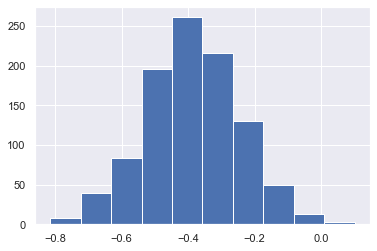

In [12]:
trial = 31
print('X: ', X_eval[trial])
print('y: ', y_eval[trial])
print('y pred: ', y_eval_preds[trial])
print('lower bound: ', lower_pi[trial])
print('upper bound: ', upper_pi[trial])
plt.hist(boot_preds[:,trial]);

In [13]:
# calibrate this now

#h_xt_yt = st.norm.cdf(y_eval, loc=model.predict(X_eval_), scale=np.std(boot_preds, axis=0))
h_xt_yt = np.mean(boot_preds <= y_eval_preds, axis=0)

P_hat = np.zeros(len(h_xt_yt))
for i, p in enumerate(h_xt_yt):
    P_hat[i] = np.sum(h_xt_yt <= p)/len(h_xt_yt)
    
calibrator = IsotonicRegression(out_of_bounds='clip')
calibrator.fit(h_xt_yt, P_hat)
#calibrated_preds = calibrator.predict(h_xt_yt)

# apply
new_quantiles = calibrator.transform([0.05, 0.95]) * 100
print(new_quantiles)
lower_pi_cal = np.percentile(boot_preds, new_quantiles[0], axis=0)
upper_pi_cal = np.percentile(boot_preds, new_quantiles[1], axis=0)

[  1. 100.]


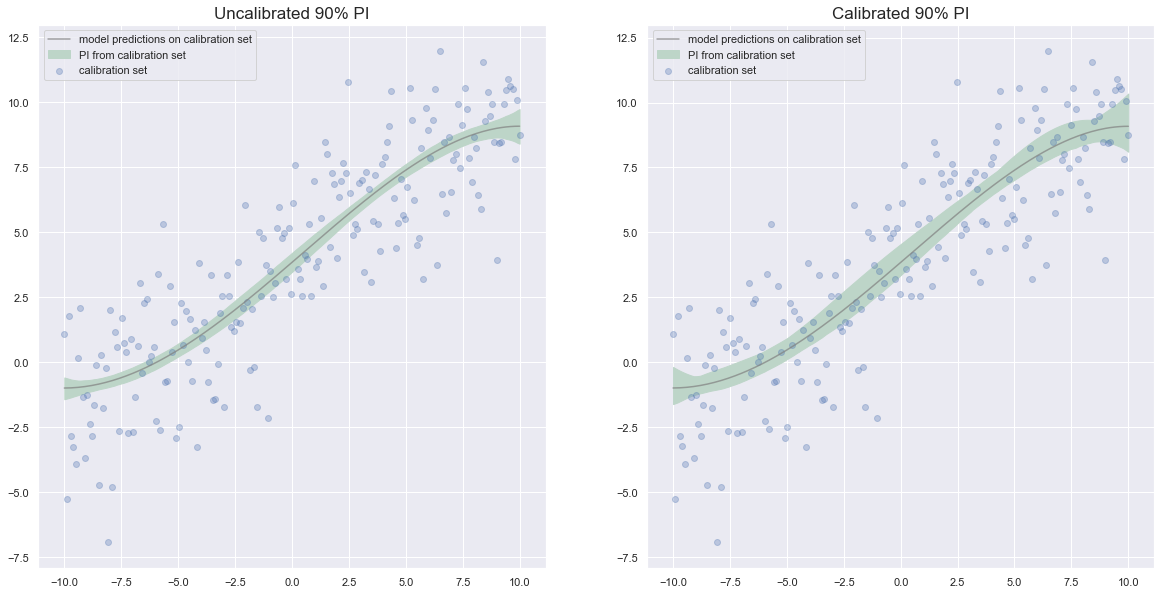

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

ax[0].fill_between(X_eval, y1=lower_pi, y2=upper_pi, color='#BDD5C8', label='PI from calibration set')
ax[0].scatter(X_eval, y_eval, alpha=0.3, label='calibration set')
ax[0].plot(X_eval, y_eval_preds, color='grey', alpha=0.7, label='model predictions on calibration set')
ax[0].legend(loc='upper left')
ax[0].set_title('Uncalibrated 90% PI', fontsize=17)

ax[1].fill_between(X_eval, y1=lower_pi_cal, y2=upper_pi_cal, color='#BDD5C8', label='PI from calibration set')
ax[1].scatter(X_eval, y_eval, alpha=0.3, label='calibration set')
ax[1].plot(X_eval, y_eval_preds, color='grey', alpha=0.7, label='model predictions on calibration set')
ax[1].legend(loc='upper left')
ax[1].set_title('Calibrated 90% PI', fontsize=17);

In [15]:
results = pd.DataFrame.from_records({'X':X_eval,
                                     'y':y_eval,
                                     'h_xt_yt':h_xt_yt, 
                                     'P_hat':P_hat})[['X','y','h_xt_yt','P_hat',]]
results.head()

,X,y,h_xt_yt,P_hat
0,-10.000000,1.083186,0.512,0.750
1,-9.899497,-5.267088,0.515,0.820
2,-9.798995,1.784496,0.522,0.965
3,-9.698492,-2.842129,0.519,0.900
4,-9.597990,-3.242170,0.514,0.800


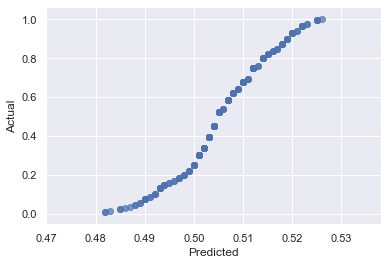

In [16]:
plt.scatter(h_xt_yt, P_hat, alpha=0.7)
plt.xlabel('Predicted')
plt.ylabel('Actual');

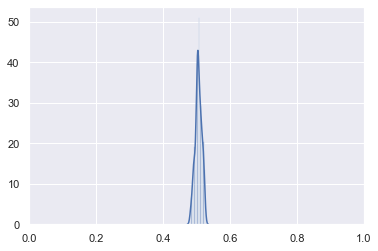

In [17]:
sns.distplot(h_xt_yt, bins=10, norm_hist=True)
plt.xlim([0,1]);

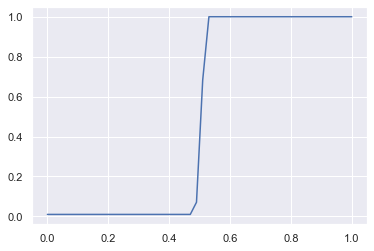

In [18]:
plt.plot(np.linspace(0,1,50), calibrator.predict(np.linspace(0,1,50)));

---

In [19]:
# bayesian model
import pymc3 as pm

In [20]:
with pm.Model() as model:
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.)
    intercept = pm.Normal('Intercept', mu=0, sigma=20)
    x = pm.Normal('x', mu=0, sigma=20, shape=2)

    # Define likelihood
    likelihood = pm.Normal('y', mu=intercept + x[0] * X + x[1] * X**2, 
                           sigma=sigma, observed=y)

    # Inference!
    trace = pm.sample(3000, cores=2)
    
    pymc3_model = model

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]
Sampling 2 chains: 100%|██████████| 7000/7000 [00:09<00:00, 735.62draws/s] 
The acceptance probability does not match the target. It is 0.8927162193890763, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8829556219988924, but should be close to 0.8. Try to increase the number of tuning steps.


In [21]:
ppc = pm.sample_posterior_predictive(trace, samples=500, model=pymc3_model)

100%|██████████| 500/500 [00:00<00:00, 617.27it/s]


In [22]:
intercept = np.mean(trace.get_values(varname='Intercept'))
x1,x2 = np.mean(trace.get_values(varname='x'), axis=0)
print(intercept, x1, x2)

point_estimates = intercept + x1*X + x2*X**2

ppc_interval = np.percentile(ppc['y'], [5, 95], axis=0)

3.9672352467886447 0.5955412905547555 0.0013902548767788783


In [23]:
h_xt_yt = np.mean(point_estimates <= ppc['y'], axis=0)

P_hat = np.zeros(len(h_xt_yt))
for i, p in enumerate(h_xt_yt):
    P_hat[i] = np.sum(h_xt_yt <= p)/len(h_xt_yt)
    
calibrator = IsotonicRegression(out_of_bounds='clip')
calibrator.fit(h_xt_yt, P_hat)

# apply
new_quantiles = calibrator.transform([0.05, 0.95]) * 100
print(new_quantiles)
ppc_interval_cal = np.percentile(ppc['y'], [new_quantiles[0], new_quantiles[1]], axis=0)

[  0.15384615 100.        ]


In [24]:
perc_within_before = np.mean((y <= ppc_interval[1,:])*(y >= ppc_interval[0,:]))
within_before = f'{perc_within_before*100:.1f}% of the test points in the 90% PI'
print(within_before)

perc_within_after = np.mean((y <= ppc_interval_cal[1,:])*(y >= ppc_interval_cal[0,:]))
within_after = f'{perc_within_after*100:.1f}% of the test points in the 90% PI'
print(within_after)

91.1% of the test points in the 90% PI
99.8% of the test points in the 90% PI


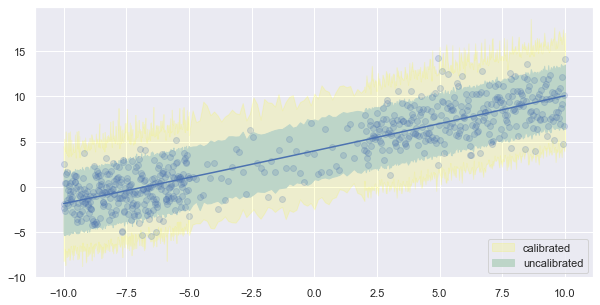

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

ax.plot(X, point_estimates)
ax.fill_between(X, y1=ppc_interval_cal[0,:], y2=ppc_interval_cal[1,:], color='yellow', alpha=0.15, label='calibrated')
ax.fill_between(X, y1=ppc_interval[0,:], y2=ppc_interval[1,:], color='#BDD5C8', label='uncalibrated')
ax.scatter(X, y, alpha=0.2)
ax.legend(loc='lower right');

<a id='references'></a>
#### References

[1]

---